# <span style="color:#336699">Web Crop Phenology Metrics Service (WCPMS) Performance Evaluation</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: Sept 14, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook explains how to use the WCPMS service to extract phenology metrics on regions from <em>Earth Observation Data Cubes</em>.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Sansigolo, G.; Queiroz, G. R.; Ferreira, K. R.; Adami, M.; Körting, T.<a href="http://www.google.com" target="_blank">A Web Service for Crop Sowing and Harvesting Detection from Earth Observation Data Cubes.
    </div>
</div>

# Python client api
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [WCPMS client for Python](https://github.com/brazil-data-cube/wcpms.py). To install it from PyPI using `pip`, use the following command:

In [486]:
!pip install git+https://github.com/GSansigolo/wcpms.py

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/GSansigolo/wcpms.py to /tmp/pip-req-build-ypkp5wa2
  Running command git clone --filter=blob:none --quiet https://github.com/GSansigolo/wcpms.py /tmp/pip-req-build-ypkp5wa2
  Resolved https://github.com/GSansigolo/wcpms.py to commit fb6ad1d873d7c6275d86aa96bad5ef76328ddf4d
  Preparing metadata (setup.py) ... done


In order to access the funcionalities of the client API, you should import the `wcpms` package and `os` package, as follows:

In [487]:
import os
from wcpms import *

After that, you should add the `wcpms` service url:

In [488]:
wcpms_url = 'http://mari.coids.inpe.br/bdc/wcpms' 

The above cell will create an string named `service` that will save the wcpms url for future use.

# Select data cube
<hr style="border:1px solid #0077b9;">

Before creating a data cube query, it is important to select a data cubes from the BDC catalog. It is possible to retrive a list with avaliable data cubes with the `get_collections` function:

In [489]:
colections=get_collections(
    url = wcpms_url
)

colections

['CBERS4-MUX-2M-1',
 'CBERS4-WFI-16D-2',
 'CBERS-WFI-8D-1',
 'landsat-2',
 'LANDSAT-16D-1',
 'mod13q1-6.1',
 'myd13q1-6.1',
 'S2-16D-2',
 'S2_L2A-1']

# Creating a data cube query
<hr style="border:1px solid #0077b9;">

To make it easier to use, there is a function to create a data cube query called `cube_query`:

In [490]:
datacube=cube_query(
    collection="S2_L2A-1",
    start_date="2019-06-01",
    end_date="2020-05-31",
    freq="16D",
    band="NDVI"
)

# Opening a shapefile to select a region
<hr style="border:1px solid #0077b9;">

To easily open a shapefile you can use the geopandas (gpd) contained in the wcpms library, there is a function called `gpd_shapefile`:

In [491]:
path_dir = os.path.dirname("")

In [1508]:
polygons = gpd_read_file(os.path.join(path_dir, "talhoes_sorteados_40/talhoes_sorteados_40.shp"))
polygons['id'] = range(1, len(polygons) + 1)

selected_polygon = polygons[polygons['id'] == 1]   
selected_polygon

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,id,Sem_date,Col_date,Obs_sos,Obs_eos,area_ha,geometry
0,35,São Paulo,SP,Sudeste,1,2019/11/18,2020/03/25,82.0,210.0,104.625983,"POLYGON ((-49.2202 -23.7956, -49.22005 -23.795..."


In order to retrieve the phenological metrics associated with a region, it's necessary to use the `get_phenometrics_region` function.

# Retrieving the Phenological Metrics for Region 
<hr style="border:1px solid #0077b9;">

In order to retrieve the phenological metrics associated with a region using an image collection insted of data cube we created a `Random_Points_in_Polygon` function and a `get_phenometrics_region_batch` function. It works by generate `100` random points from the selected geometry. The metrics are calculated using time series `EVI2`, for each pixel centers within the list of random points of the given region from `June 1st, 2019` to `May 31st, 2020`.

In [1509]:
import numpy as np
from shapely.geometry import Point
import matplotlib 
from matplotlib import pyplot as plt

def Random_Points_in_Polygon(polygon, number):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

In [1510]:
number_of_points = 50

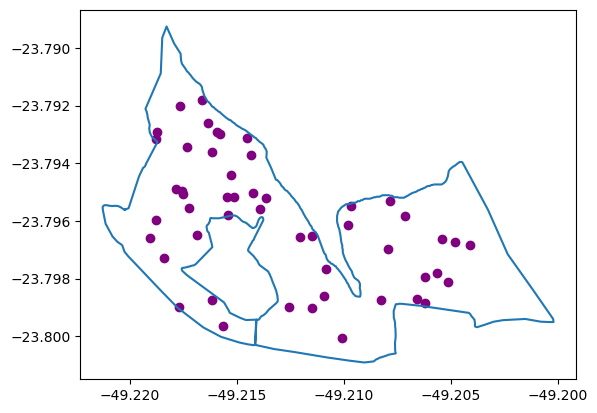

In [1511]:
polygon = selected_polygon['geometry'][0]
points = Random_Points_in_Polygon(polygon, number_of_points)

xp,yp = polygon.exterior.xy
plt.plot(xp,yp)

xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys,color="purple")
plt.show()

# Retrieving satellite image time series from BDC image collections
<hr style="border:1px solid #0077b9;">

In [1512]:
import urllib
import requests

url_wtss = 'http://mari.coids.inpe.br/bdc/wtss/v4'

def get_timeseries_image_collection(cube, latitude, longitude, band, cloud_filter=None):
    query = dict(
        coverage=cube['collection'],
        attributes=band,
        start_date=cube['start_date'],
        end_date=cube['end_date'],
        latitude=latitude,
        longitude=longitude,
    )
    url_suffix = '/time_series?'+urllib.parse.urlencode(query)
    data = requests.get(url_wtss + url_suffix) 
    data_json = data.json()
    if data.status_code:
        try:
            ts = data_json['result']['attributes'][0]['values']
            timeline = data_json['result']['timeline']
        except:
            ts = []
            timeline = []
    else:
        ts = []
        timeline = []

    if cloud_filter:
        if data.status_code:
            cloud = cloud_dict[cube['collection']]
            cloud_query = dict(
                coverage=cube['collection'],
                attributes=cloud['cloud_band'],
                start_date=cube['start_date'],
                end_date=cube['end_date'],
                latitude=point['coordinates'][1],
                longitude=point['coordinates'][0],
            )
            cloud_url_suffix = '/time_series?'+urllib.parse.urlencode(cloud_query)
            cloud_data = requests.get(url_wtss + cloud_url_suffix) 
            cloud_data_json = cloud_data.json()
            try:
                cloud_array = create_filter_array(cloud_data_json['result']['attributes'][0]['values'], cloud['cloud_values'], cloud['non_cloud_values'])
                ts = data_json['result']['attributes'][0]['values']
                for i in range(len(ts)):
                    if cloud_array[i] == 0:
                        ts[i] = -9999
            except:
                cloud_array = []
                ts = []
                timeline = []
        else:
            ts = []
            timeline = []
    return dict(values=ts, timeline=timeline)

# Calculating EVI2 
<hr style="border:1px solid #0077b9;">

In [1513]:
def evi2(b04_series, b08_series):
    b04 = np.asarray(b04_series)
    b08 = np.asarray(b08_series)
    numerator = b08 - b04
    denominator = b08 + b04 + 1.0
    evi2 = 2.4 * numerator / denominator
    evi2 = np.where(denominator == 0, 0, evi2)
    return list(evi2)

# Batch retrieval of satellite region image time series
<hr style="border:1px solid #0077b9;">

In [1515]:
def get_timeseries_region_batch(batch_points):
    timeseries = []
    for i in range(0, 10):
        B08 = get_timeseries_image_collection(
            cube=datacube, 
            band="B08",
            cloud_filter=None,
            latitude=batch_points[i].y, 
            longitude=batch_points[i].x
        )
        B04 = get_timeseries_image_collection(
            cube=datacube, 
            band="B04",
            cloud_filter=None,
            latitude=batch_points[i].y, 
            longitude=batch_points[i].x
        )
        ts_evi2 = evi2(B04['values'],B08['values'])
        new_values = []
        new_timeline = []
        for i in range(len(B04['timeline'])):
            if (ts_evi2[i] != 0.0):
                new_values = new_values + [ts_evi2[i]]
                new_timeline = new_timeline + [B04['timeline'][i].replace('Z','')]
        timeseries = timeseries + [dict(timeline=new_timeline, values=new_values)]
    return timeseries

timeseries = []
evi2_list = []
for i in range(0, len(points), 10):
    end = min(i + 10, len(points))  
    result = get_timeseries_region_batch(points[i:end])
    evi2_list = evi2_list +  [d['values'] for d in result]
    timeseries = timeseries + result
    print(f"Processing from {i} to {end}")

Processing from 0 to 10
Processing from 10 to 20
Processing from 20 to 30
Processing from 30 to 40
Processing from 40 to 50


# Plot of all satellite images time series
<hr style="border:1px solid #0077b9;">

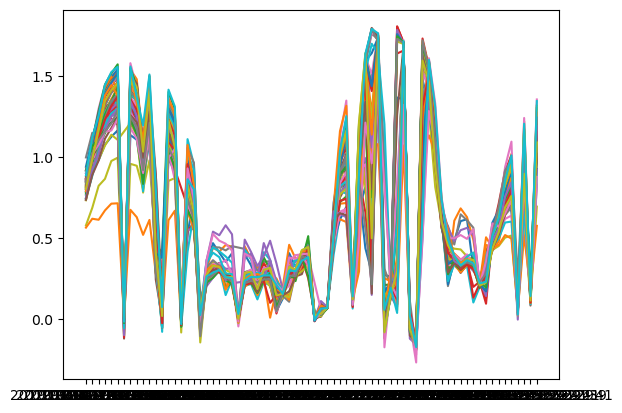

In [1516]:
import matplotlib.pyplot as plt
from datetime import datetime

for i in range(0, len(points)):
    plt.plot(timeseries[i]['timeline'], timeseries[i]['values'], label='EVI2') 

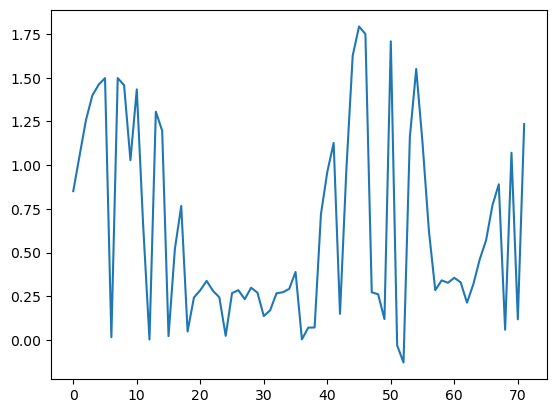

In [1522]:
plt.plot(smtimeseries[0]['values'], label='EVI2') 

In [1474]:
len(timeseries)

50

# Batch calculation of phenological metrics from BDC image collection time series
<hr style="border:1px solid #0077b9;">

In [1475]:
from wcpms_server import wcpms_array, smooth_timeseries

config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1#,
    #date_format='yyyy-mm-dd'
)

In [1504]:
phenometrics = []
for i in range(0, len(timeseries), 10):
    end = min(i + 10, len(timeseries))  
    for ts in timeseries[i:end]:
        evi2_array = wcpms_array(
            timeserie=smooth_timeseries(ts['values'], method='savitsky', window_length=11, polyorder=9),
            timeline=ts['timeline']
        )
        pm = calc_phenometrics(
            da=evi2_array,
            engine='phenolopy',
            config=config,
            start_date="2019-06-01",
        )
        phenometrics = phenometrics + [pm]
    print(f"Processing from {i} to {end}")

Processing from 0 to 10
Processing from 10 to 20
Processing from 20 to 30
Processing from 30 to 40
Processing from 40 to 50


In [1505]:
len(phenometrics)

50

# List all SOS phenological metric 
<hr style="border:1px solid #0077b9;">

In [1506]:
sos = []
for pm in phenometrics:
    sos = sos + [pm['sos_t']]
print(sos)
np.median(sos)

[55, 55, 135, 145, 55, 10, 55, 55, 145, 135, 145, 55, 55, 135, 145, 10, 35, 35, 55, 35, 35, 35, 10, 55, 145, 55, 10, 55, 10, 10, 135, 135, 135, 10, 135, 145, 135, 55, 35, 10, 145, 35, 55, 145, 145, 35, 10, 135, 55, 135]


55.0

# Show the SOS obs from field data 
<hr style="border:1px solid #0077b9;">

In [1507]:
int(selected_polygon['Obs_sos'])

47

# References
<hr style="border:1px solid #0077b9;">

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [WCPMS Introduction Examples](./wcpms-introduction.ipynb)